In [1]:
# Run SVM algorithm on the loan dataset

In [2]:
# all necessary imports

import pandas as pd
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
dataset = pd.read_excel('loan.xlsx')
new_dataset = dataset
dataset.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [4]:
# data preprocessing for loan.xlsx file was done
# in the previous assignment. The reference for preprocessing
# has been taken from the previous assignment

# dataset summary
dataset.describe()

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,31.510163,4.650758,1.871795,2.279720,176.727273,898.382284
std,11.843595,4.804037,3.254023,3.966105,142.590659,3814.565340
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.000000,0.000000,80.000000,0.000000
50%,28.500000,2.750000,1.000000,0.000000,160.000000,10.000000
75%,38.250000,7.000000,2.000000,3.000000,272.000000,484.000000
max,76.750000,25.209999,20.000000,23.000000,760.000000,51100.000000


In [5]:
# finding out null data => missing data
dataset.isnull().sum()

# inference => no missing data

Sex                0
Age                0
Time_at_address    0
Res_status         0
Telephone          0
Occupation         0
Job_status         0
Time_employed      0
Time_bank          0
Liab_ref           0
Acc_ref            0
Home_Expn          0
Balance            0
Decision           0
dtype: int64

In [6]:
dataset.shape

# before calculating correlation, we shall one. hot encode Sex, Res_Status, Telephone, Occupation, Job Status, Acc_ref, Decision

(429, 14)

In [7]:
# one hot encoding
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# label encoder
label_encoder = LabelEncoder()

In [8]:
# sex
print('Sex: ', dataset['Sex'].nunique())

new_dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])

Sex:  2


In [9]:
# Res_Status
print('Res_status: ', dataset['Res_status'].nunique())

dataset['Res_status'] = label_encoder.fit_transform(dataset['Res_status'])

Res_status:  2


In [10]:
# Telephone
print('Telephone: ', dataset['Telephone'].nunique())

dataset['Telephone'] = label_encoder.fit_transform(dataset['Telephone'])

Telephone:  2


In [11]:
# Acc_ref
print('Acc_ref: ', dataset['Acc_ref'].nunique())

dataset['Acc_ref'] = label_encoder.fit_transform(dataset['Acc_ref'])

Acc_ref:  2


In [12]:
# Liab_ref
print('Liab_ref: ', dataset['Liab_ref'].nunique())

dataset['Liab_ref'] = label_encoder.fit_transform(dataset['Liab_ref'])

Liab_ref:  2


In [13]:
# Decision
print(dataset['Decision'].dtype)
print('Decision: ', dataset['Decision'].nunique())

dataset['Decision'] = label_encoder.fit_transform(dataset['Decision'])

object
Decision:  2


In [14]:
# Job_status

print('Job_status: ', dataset['Job_status'].unique())

Job_status:  ['unemploye' 'governmen' 'private_s' 'self_empl' 'retired' 'student'
 'military']


In [15]:
# Occupation
print('Occupation: ', dataset['Occupation'].unique())

# dataset['Occupation'] = label_encoder.fit_transform(dataset['Res_Status'])

Occupation:  ['unemploye' 'labourer' 'creative_' 'driver' 'professio' 'manager'
 'guard_etc' 'executive' 'office_st' 'productio' 'semi_pro' 'sales']


In [16]:
features_array = onehot_encoder.fit_transform(dataset[['Job_status', 'Occupation']]).toarray()

In [17]:
feature_labels = ['governmen', 'military', 'private_s', 'retired', 'self_empl',
        'student', 'unemploye', 'creative_', 'driver', 'executive', 'guard_etc', 'labourer',
        'manager', 'office_st', 'productio', 'professio', 'sales',
        'semi_pro', 'unemploye']
feature_labels

['governmen',
 'military',
 'private_s',
 'retired',
 'self_empl',
 'student',
 'unemploye',
 'creative_',
 'driver',
 'executive',
 'guard_etc',
 'labourer',
 'manager',
 'office_st',
 'productio',
 'professio',
 'sales',
 'semi_pro',
 'unemploye']

In [18]:
features = pd.DataFrame(features_array, columns = feature_labels)

In [19]:
dataset = pd.concat([dataset, features], axis=1)

In [20]:
dataset.drop(['Occupation','Job_status'], axis=1, inplace=True)

In [21]:
dataset.columns

Index(['Sex', 'Age', 'Time_at_address', 'Res_status', 'Telephone',
       'Time_employed', 'Time_bank', 'Liab_ref', 'Acc_ref', 'Home_Expn',
       'Balance', 'Decision', 'governmen', 'military', 'private_s', 'retired',
       'self_empl', 'student', 'unemploye', 'creative_', 'driver', 'executive',
       'guard_etc', 'labourer', 'manager', 'office_st', 'productio',
       'professio', 'sales', 'semi_pro', 'unemploye'],
      dtype='object')

In [22]:
# data prepared for correlation

corr = dataset.corr()
corr

,Sex,Age,Time_at_address,Res_status,Telephone,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,...,executive,guard_etc,labourer,manager,office_st,productio,professio,sales,semi_pro,unemploye
Sex,1.000000,0.025167,-0.031594,0.121713,0.121713,0.077239,-0.072303,0.010508,0.095826,0.115355,...,0.033932,0.022947,-0.008220,0.141564,-0.239058,0.089171,-0.028788,-0.116177,0.057602,-0.085110
Age,0.025167,1.000000,0.217342,-0.080265,-0.080265,0.426890,0.208736,0.049109,-0.040445,-0.072254,...,0.195693,0.028675,-0.035318,0.056127,-0.085265,-0.025142,-0.008012,-0.061906,-0.002900,0.210038
Time_at_address,-0.031594,0.217342,1.000000,-0.100614,-0.100614,0.278849,0.202083,-0.049978,-0.144258,-0.267470,...,0.194672,-0.074592,-0.027105,-0.062565,0.060743,0.007001,-0.023361,0.018662,-0.069254,0.028853
Res_status,0.121713,-0.080265,-0.100614,1.000000,1.000000,-0.074690,-0.132413,0.018827,-0.000201,-0.006477,...,-0.013801,-0.059316,0.103196,-0.007468,-0.141542,0.015006,0.058154,-0.043244,0.012631,0.048437
Telephone,0.121713,-0.080265,-0.100614,1.000000,1.000000,-0.074690,-0.132413,0.018827,-0.000201,-0.006477,...,-0.013801,-0.059316,0.103196,-0.007468,-0.141542,0.015006,0.058154,-0.043244,0.012631,0.048437
Time_employed,0.077239,0.426890,0.278849,-0.074690,-0.074690,1.000000,0.291542,0.122561,-0.025000,-0.110933,...,0.158402,-0.048504,-0.076296,0.085916,0.045731,-0.005221,0.065455,-0.080398,0.001919,-0.042615
Time_bank,-0.072303,0.208736,0.202083,-0.132413,-0.132413,0.291542,1.000000,0.051000,-0.158334,-0.111761,...,0.070908,-0.079085,-0.102461,-0.004365,0.115238,-0.035694,0.030341,-0.087884,0.042998,-0.026283
Liab_ref,0.010508,0.049109,-0.049978,0.018827,0.018827,0.122561,0.051000,1.000000,0.033197,0.127133,...,-0.047445,0.051444,0.044265,0.041821,-0.005693,0.037271,0.030484,-0.057168,-0.003053,-0.086354
Acc_ref,0.095826,-0.040445,-0.144258,-0.000201,-0.000201,-0.025000,-0.158334,0.033197,1.000000,0.096426,...,0.023691,-0.017403,0.029235,0.254292,-0.071914,-0.036777,-0.063317,-0.077889,-0.019012,-0.041226
Home_Expn,0.115355,-0.072254,-0.267470,-0.006477,-0.006477,-0.110933,-0.111761,0.127133,0.096426,1.000000,...,-0.022788,0.070586,-0.024372,0.121765,-0.017424,0.048673,0.112318,-0.049655,0.094591,-0.139506


In [23]:
# dropping columns based on correlations

# also dropping Time_at_address as it plays trivial role in decision making

dataset.drop(['Telephone', 'Time_at_address'], axis=1, inplace=True)

In [24]:
dataset.columns

# inference => we have 33 variables

Index(['Sex', 'Age', 'Res_status', 'Time_employed', 'Time_bank', 'Liab_ref',
       'Acc_ref', 'Home_Expn', 'Balance', 'Decision', 'governmen', 'military',
       'private_s', 'retired', 'self_empl', 'student', 'unemploye',
       'creative_', 'driver', 'executive', 'guard_etc', 'labourer', 'manager',
       'office_st', 'productio', 'professio', 'sales', 'semi_pro',
       'unemploye'],
      dtype='object')

In [25]:
dataset.head()

,Sex,Age,Res_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision,...,executive,guard_etc,labourer,manager,office_st,productio,professio,sales,semi_pro,unemploye
0,1,50.750000,0,0,0,0,0,145,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,19.670000,1,0,0,1,0,140,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,52.830002,0,5,14,0,0,0,2200,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,22.670000,1,2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,29.250000,0,0,0,0,0,228,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X = dataset[['Sex', 'Age', 'Res_status', 'Time_employed', 'Time_bank', 'Liab_ref',
       'Acc_ref', 'Home_Expn', 'Balance', 'governmen', 'military',
       'private_s', 'retired', 'self_empl', 'student', 'unemploye',
       'creative_', 'driver', 'executive', 'guard_etc', 'labourer', 'manager',
       'office_st', 'productio', 'professio', 'sales', 'semi_pro',
       'unemploye']].iloc[:, :].values

y = dataset[['Decision']].iloc[:].values

In [27]:
# Receiver Operating Characteristic Curve.
# An ROC Curve is a plot which shows the performance
# of a classification model at various classification
# threshold levels.

def __roc_curve__(_y_test_, _y_pred_):
    fpr, tpr, thresholds = roc_curve(_y_test_, _y_pred_)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')

    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()


In [28]:
# 2 popular kernels are Linear and RBF

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

C = 1.0  # SVM regularization parameter
svc_classifier = svm.SVC(kernel='linear', C=C)
svc = svc_classifier.fit(X_train, y_train)

rbf_svc_classifier = svm.SVC(kernel='rbf', gamma=0.7, C=C)
rbf_svc = rbf_svc_classifier.fit(X_train, y_train)

poly_svc_classifier = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
poly_svc = poly_svc_classifier.fit(X_train, y_train)

lin_svc_classifier = svm.LinearSVC(C=C)
lin_svc = lin_svc_classifier.fit(X_train, y_train)

C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

SVC Prediction:  [0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 0 1 1 1 1 1 0]

SVC Confusion Matrix: 
 [[25 15]
 [ 8 38]]

SVC Classification Report: 
 [[25 15]
 [ 8 38]]


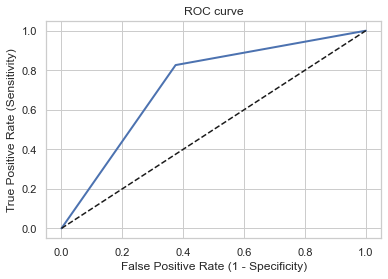

In [29]:
y_pred_svc = svc.predict(X_test)
print("SVC Prediction: ", y_pred_svc)

cm_svc = confusion_matrix(y_test, y_pred_svc)
print("\nSVC Confusion Matrix: \n", cm_svc)

classification_report(y_test, y_pred_svc)
print("\nSVC Classification Report: \n", cm_svc)

__roc_curve__(y_test, y_pred_svc)

RBF_SVC Prediction:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]

RBF_SVC Confusion Matrix: 
 [[ 0 40]
 [ 0 46]]

RBF_SVC Classification Report: 
 [[ 0 40]
 [ 0 46]]


C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

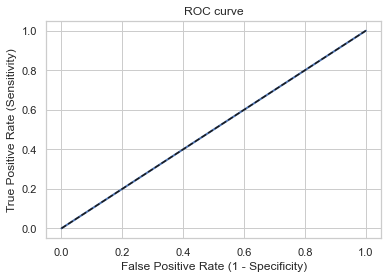

In [30]:
y_pred_rbf_svc = rbf_svc.predict(X_test)
print("RBF_SVC Prediction: ", y_pred_rbf_svc)

cm_rbf_svc = confusion_matrix(y_test, y_pred_rbf_svc)
print("\nRBF_SVC Confusion Matrix: \n", cm_rbf_svc)

classification_report(y_test, y_pred_rbf_svc)
print("\nRBF_SVC Classification Report: \n", cm_rbf_svc)

__roc_curve__(y_test, y_pred_rbf_svc)

poly_svc Prediction:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1]

poly_svc Confusion Matrix: 
 [[ 4 36]
 [ 1 45]]

RBF_SVC Classification Report: 
 [[ 4 36]
 [ 1 45]]


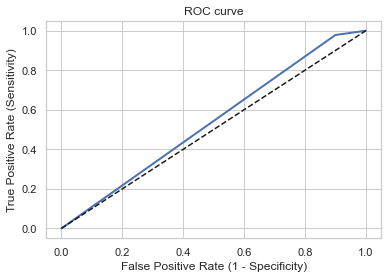

In [31]:
y_pred_poly_svc = poly_svc.predict(X_test)
print("poly_svc Prediction: ", y_pred_poly_svc)

cm_poly_svc = confusion_matrix(y_test, y_pred_poly_svc)
print("\npoly_svc Confusion Matrix: \n", cm_poly_svc)

classification_report(y_test, y_pred_poly_svc)
print("\nRBF_SVC Classification Report: \n", cm_poly_svc)

__roc_curve__(y_test, y_pred_poly_svc)

lin_svc Prediction:  [0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1
 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1
 1 0 1 1 0 0 0 1 1 1 1 0]

lin_svc Confusion Matrix: 
 [[26 14]
 [10 36]]

RBF_SVC Classification Report: 
 [[26 14]
 [10 36]]


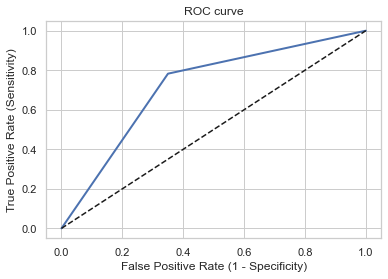

In [32]:
y_pred_lin_svc = lin_svc.predict(X_test)
print("lin_svc Prediction: ", y_pred_lin_svc)

from sklearn.metrics import confusion_matrix
cm_lin_svc = confusion_matrix(y_test, y_pred_lin_svc)
print("\nlin_svc Confusion Matrix: \n", cm_lin_svc)

classification_report(y_test, y_pred_lin_svc)
print("\nRBF_SVC Classification Report: \n", cm_lin_svc)

__roc_curve__(y_test, y_pred_lin_svc)

In [33]:
# After being fitted, the model can then be used to predict new values

# SVMs decision function depends on some
# subset of the training data, called the
# support vectors.

# get support vectors
# print("svc: ",svc.support_vectors_)
# print("rbf_svc: ",rbf_svc.support_vectors_)
# print("poly_svc: ",poly_svc.support_vectors_)

In [34]:
# get indices of support vectors
# print("svc: ",svc.support_)
# print("rbf_svc: ",rbf_svc.support_)
# print("poly_svc: ",poly_svc.support_)

In [35]:
# get number of support vectors for each class

# print("svc: ",svc.n_support_)
# print("rbf_svc: ",rbf_svc.n_support_)
# print("poly_svc: ",poly_svc.n_support_)

In [36]:
# the complexity of Linear Classifier < RBF Classifier
# because RBF uses an exponential classification system

# Linear SVC doesn't operate on the concept of n Support vectors
# thus we cannot compute the above 3 properties

In [37]:
# k-fold cross-validation is a very useful technique
# to evaluate model performance. But, it fails here
# because we have a imbalanced dataset. So, in the case
# of imbalanced dataset, I will use another technique
# to evaluate model performance. It is called stratified
# k-fold cross-validation

In [38]:
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
svc_scores = cross_val_score(svc, X, y, cv=kfold)
rbf_svc_scores = cross_val_score(rbf_svc, X, y, cv=kfold)
poly_svc_scores = cross_val_score(poly_svc, X, y, cv=kfold)
lin_svc_scores = cross_val_score(lin_svc, X, y, cv=kfold)

print("SVC scores: ", svc_scores)
print("RBF SVC scores: ", rbf_svc_scores)
print("POLY SVC scores: ", poly_svc_scores)
print("LIN SVC scores: ", lin_svc_scores)

# if model predictions are similar to the prediction made by the models
# post KFold, then this step serves no useful purpose

C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

SVC scores:  [0.81395349 0.77906977 0.79069767 0.75581395 0.75294118]
RBF SVC scores:  [0.58139535 0.58139535 0.52325581 0.53488372 0.54117647]
POLY SVC scores:  [0.59302326 0.61627907 0.56976744 0.53488372 0.61176471]
LIN SVC scores:  [0.80232558 0.70930233 0.6744186  0.59302326 0.43529412]


C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

In [39]:
# Receiver Operating Characteristic - Area Under Curve is a technique
# to compare classifier performance. Here, we measure the area under
# the curve (AUC). A perfect classifier will have a ROC AUC equal to 1,
# whereas a purely random classifier will have a ROC AUC equal to 0.5.

In [40]:
ROC_AUC_svc = roc_auc_score(y_test, y_pred_svc)
ROC_AUC_rbf_svc = roc_auc_score(y_test, y_pred_rbf_svc)
ROC_AUC_poly_svc = roc_auc_score(y_test, y_pred_poly_svc)
ROC_AUC_lin_svc = roc_auc_score(y_test, y_pred_lin_svc)

print("SVC AUC scores: ", ROC_AUC_svc)
print("RBF SVC AUC scores: ", ROC_AUC_rbf_svc)
print("POLY SVC AUC scores: ", ROC_AUC_poly_svc)
print("LIN SVC AUC scores: ", ROC_AUC_lin_svc)


# inference:
# SVC model performs best compared to others in this case

SVC AUC scores:  0.7255434782608695
RBF SVC AUC scores:  0.5
POLY SVC AUC scores:  0.5391304347826087
LIN SVC AUC scores:  0.716304347826087


In [ ]:
# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]




grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\devsh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', grid_search.best_params_)


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', grid_search.best_estimator_)

In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))
